# **Data Mining CW**
#### Student: Nadia Lashram
#### Student ID: 180001770
#### Programme: MSC AAI

This document will go through the analysis of a dataset containing epitope information for the T.cruzi parasite. This dataset will be used to create a predition pipeline which will then be used on a set of feature data to predict the classes to which the epitope features belong. 

## **Exploratory Data Analysis and Pre-processing**
EDA is performed on the dataset to check the structure, missing values, outliers, and treat them as part of data pre-processing

In [128]:
#Import the libaries required for analysis and pre-processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit

df=pd.read_csv('df.csv', sep = ';') #read data
print (df.describe) #shows the data in table
print (df.info()) #givs information relating to data
print (df.shape) #(observations,variables)

<bound method NDFrame.describe of            Info_PepID  Info_organism_id Info_protein_id  Info_pos Info_AA  \
0      XP_809948.1:15              5693     XP_809948.1       218       E   
1      XP_809948.1:15              5693     XP_809948.1       219       E   
2      XP_809948.1:15              5693     XP_809948.1       220       D   
3      XP_809948.1:15              5693     XP_809948.1       221       N   
4      XP_809948.1:15              5693     XP_809948.1       222       E   
...               ...               ...             ...       ...     ...   
49601   XP_812261.1:6              5693     XP_812261.1        94       I   
49602  XP_804477.1:18              5693     XP_804477.1       370       D   
49603   XP_813734.1:4              5693     XP_813734.1       112       G   
49604   XP_812183.1:6              5693     XP_812183.1       144       G   
49605  XP_814147.1:10              5693     XP_814147.1       190       E   

                   Info_epitope_id Info_n

In [129]:
#Check Dataframe for missing feature values
missing_features = df.isnull().sum()
missing_features_sorted = missing_features.sort_values(ascending=False)
print(missing_features)
print(missing_features_sorted)

Info_PepID           0
Info_organism_id     0
Info_protein_id      0
Info_pos             0
Info_AA              0
                    ..
feat_esm1b_1276     84
feat_esm1b_1277     85
feat_esm1b_1278     83
feat_esm1b_1279     81
feat_esm1b_1280     82
Length: 1291, dtype: int64
feat_esm1b_148     44655
feat_esm1b_1121       88
feat_esm1b_469        88
feat_esm1b_332        88
feat_esm1b_56         88
                   ...  
Info_epitope_id        0
Info_AA                0
Info_pos               0
Info_protein_id        0
Info_PepID             0
Length: 1291, dtype: int64


In [130]:
#Remove feature with most missing values from full dataset
df.drop(columns = ['feat_esm1b_148'], inplace = True)

In [131]:
#Check Dataframe for missing feature values
missing_features = df.isnull().sum()
missing_features_sorted = missing_features.sort_values(ascending=False)
print(missing_features_sorted)

feat_esm1b_634     88
feat_esm1b_332     88
feat_esm1b_56      88
feat_esm1b_1121    88
feat_esm1b_645     88
                   ..
Info_epitope_id     0
Info_AA             0
Info_pos            0
Info_protein_id     0
Info_PepID          0
Length: 1290, dtype: int64


In [132]:
#checking for missing values in observations rows - EDA
missing_observations = df.isnull().sum(axis=1)
missing_observations_sorted = missing_observations.sort_values(ascending=False)
print(missing_observations_sorted)

missing_observations_500 = missing_observations_sorted[missing_observations_sorted>500]
print(missing_observations_500)

26248    1216
27918    1216
13138    1216
6423     1216
36698    1215
         ... 
16546       0
16547       0
16548       0
16549       0
49605       0
Length: 49606, dtype: int64
26248    1216
27918    1216
13138    1216
6423     1216
36698    1215
         ... 
4316     1215
33898    1215
17405    1215
27488    1215
9513     1215
Length: 88, dtype: int64


In [133]:
#Drop observations with most missing values
df.drop(index=missing_observations_500.index, inplace=True)

In [134]:
#checking for missing values in observations rows - EDA
missing_observations = df.isnull().sum(axis=1)
missing_observations_sorted = missing_observations.sort_values(ascending=False)
print(missing_observations_sorted)

missing_observations_500 = missing_observations_sorted[missing_observations_sorted>500]
print(missing_observations_500)

0        0
33036    0
33062    0
33063    0
33064    0
        ..
16529    0
16530    0
16531    0
16532    0
49605    0
Length: 49518, dtype: int64
Series([], dtype: int64)


In [135]:
#check how data is split by info_cluster - EDA
class_distribution = df['Info_cluster'].value_counts()
print (class_distribution)

205    1416
154    1213
153     855
211     740
44      684
       ... 
198      21
233      21
227      21
19       15
253      14
Name: Info_cluster, Length: 265, dtype: int64


In [136]:
#split into just class and feature variables for EDA - no need for info columns
feature_variables = df.filter(regex='^(feat_|Class)')

print (feature_variables.isna().sum())
print (feature_variables.info())

Class              0
feat_esm1b_0       0
feat_esm1b_1       0
feat_esm1b_2       0
feat_esm1b_3       0
                  ..
feat_esm1b_1276    0
feat_esm1b_1277    0
feat_esm1b_1278    0
feat_esm1b_1279    0
feat_esm1b_1280    0
Length: 1281, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49518 entries, 0 to 49605
Columns: 1281 entries, Class to feat_esm1b_1280
dtypes: float64(1280), int64(1)
memory usage: 484.3 MB
None


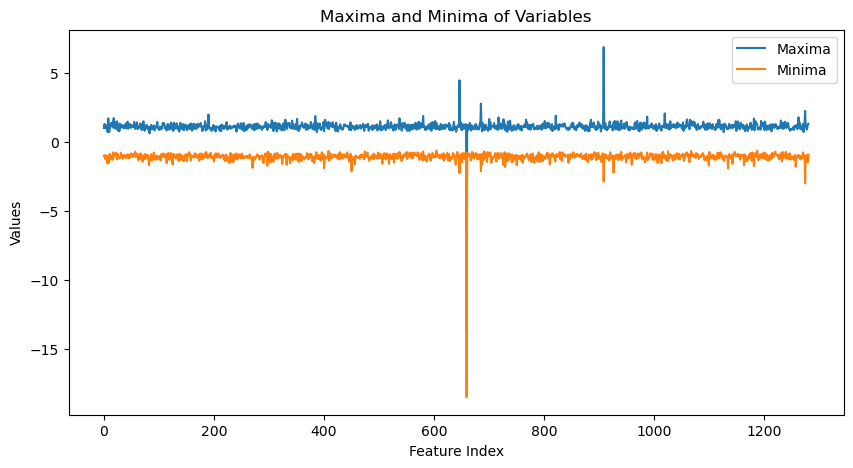

In [137]:
#plotting the maxima and minima values of each feature variable into line graph -EDA
max_values = feature_variables.max(axis=0)
min_values = feature_variables.min(axis=0)
feature_indices = range(len(feature_variables.columns)) #creates a range of numeric values for the feature variables so it can be plotted.
plt.figure(figsize=(10, 5))
plt.plot(feature_indices, max_values, label='Maxima')
plt.plot(feature_indices, min_values, label='Minima')
plt.title('Maxima and Minima of Variables')
plt.xlabel('Feature Index')
plt.ylabel('Values')
plt.legend()
plt.show()

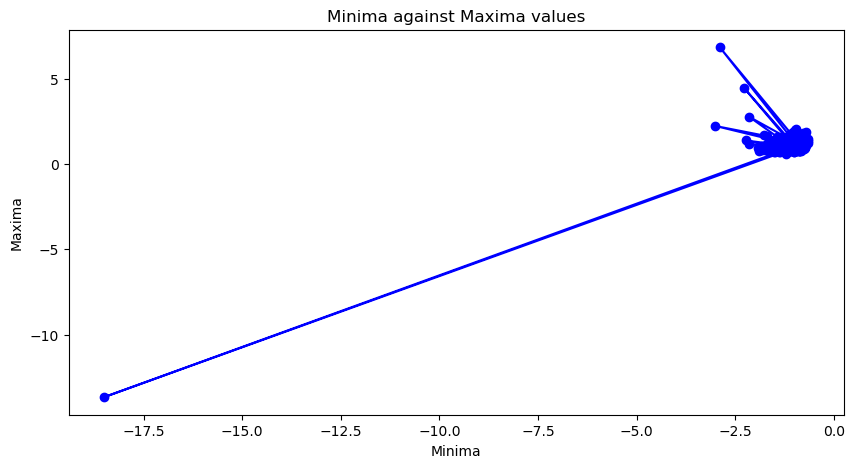

In [138]:
#plotting the minima against the maxima -EDA
plt.figure(figsize= (10,5))
plt.plot(min_values, max_values, marker ='o', color = 'blue')
plt.title('Minima against Maxima values')
plt.xlabel('Minima')
plt.ylabel('Maxima')
plt.show()

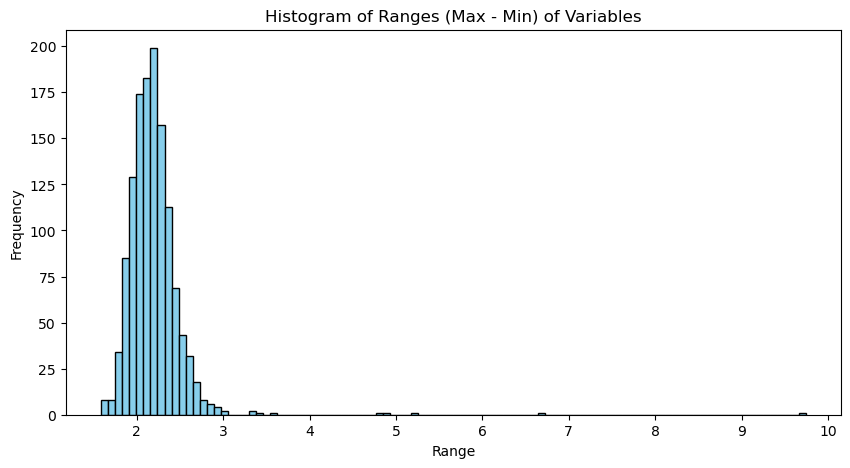

In [139]:
#plotting the ranges in a histogram- EDA
ranges = max_values- min_values

plt.figure(figsize=(10, 5))
plt.hist(ranges,bins= 100, color='skyblue', edgecolor='black')
plt.title('Histogram of Ranges (Max - Min) of Variables')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.show()

In [140]:
#splitting the data into training and testing using info_cluster
split_data = GroupShuffleSplit(n_splits=1, random_state=42, test_size=0.25, train_size=0.75)
train_set = None
test_set = None
for train_index, test_index in split_data.split(feature_variables, groups=df['Info_cluster']):
    train_set = feature_variables.iloc[train_index]
    test_set = feature_variables.iloc[test_index]

print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36390 entries, 0 to 49605
Columns: 1281 entries, Class to feat_esm1b_1280
dtypes: float64(1280), int64(1)
memory usage: 355.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13128 entries, 94 to 49601
Columns: 1281 entries, Class to feat_esm1b_1280
dtypes: float64(1280), int64(1)
memory usage: 128.4 MB
None


In [141]:
#double check missing values in train data 
missing_train_feature_values = train_set.isnull().sum()
missing_train_feature_values_sorted = missing_train_feature_values.sort_values(ascending=False)
print(missing_train_feature_values_sorted)

missing_train_observation_values = train_set.isnull().sum(axis=1)
missing_train_observation_values_sorted = missing_train_observation_values.sort_values(ascending = False)
print (missing_train_observation_values_sorted)

Class              0
feat_esm1b_641     0
feat_esm1b_859     0
feat_esm1b_858     0
feat_esm1b_857     0
                  ..
feat_esm1b_426     0
feat_esm1b_425     0
feat_esm1b_424     0
feat_esm1b_423     0
feat_esm1b_1280    0
Length: 1281, dtype: int64
0        0
33121    0
33112    0
33113    0
33116    0
        ..
16551    0
16550    0
16549    0
16548    0
49605    0
Length: 36390, dtype: int64


In [142]:
#double check missing values in test data
missing_test_feature_values = test_set.isnull().sum()
missing_test_feature_values_sorted = missing_test_feature_values.sort_values(ascending=False)
print(missing_test_feature_values_sorted)

missing_test_observation_values = test_set.isnull().sum(axis=1)
missing_test_observation_values_sorted = missing_test_observation_values.sort_values(ascending = False)
print (missing_test_observation_values_sorted)

Class              0
feat_esm1b_641     0
feat_esm1b_859     0
feat_esm1b_858     0
feat_esm1b_857     0
                  ..
feat_esm1b_426     0
feat_esm1b_425     0
feat_esm1b_424     0
feat_esm1b_423     0
feat_esm1b_1280    0
Length: 1281, dtype: int64
94       0
32966    0
32936    0
32939    0
32940    0
        ..
16426    0
16433    0
16434    0
16440    0
49601    0
Length: 13128, dtype: int64


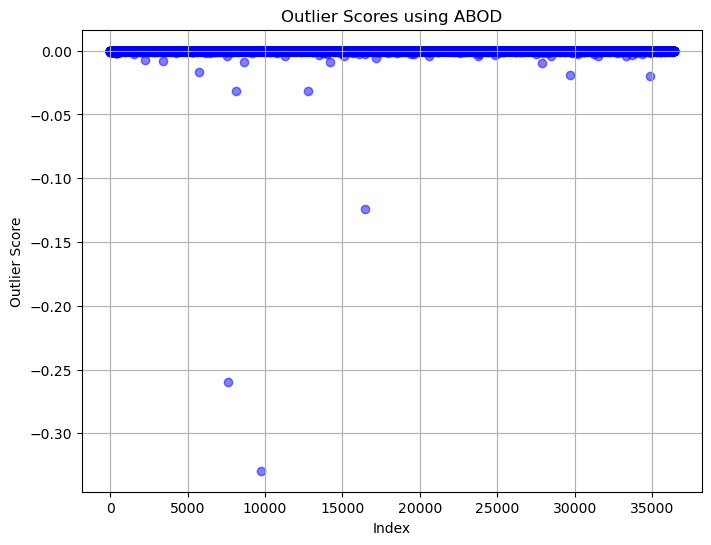

In [143]:
#Use ABOD for a quick check of outliers

from pyod.models.abod import ABOD
train_features = train_set.filter(regex='^(feat_)')

abod_model = ABOD(contamination=0.05, method='fast', n_neighbors=10)
abod_model.fit(train_features)
outlier_scores = abod_model.decision_scores_

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(outlier_scores)), outlier_scores, c='blue', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Outlier Score')
plt.title('Outlier Scores using ABOD')
plt.grid(True)
plt.show()


In [144]:
#Use Z-score for another check and the distribution of outliers

def outliers_z_score(df):
    threshold = 3

    mean = np.mean(df)
    std = np.std(df)
    z_scores = [(y - mean) / std for y in df]
    return np.where(np.abs(z_scores) > threshold)

my_list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_columns = list(train_features.select_dtypes(include=my_list).columns)
numerical_columns = train_features[num_columns]
numerical_columns.head(3)

outlier_list = numerical_columns.apply(lambda x: outliers_z_score(x))
outlier_list

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,feat_esm1b_1280
0,"[407, 535, 606, 772, 783, 790, 931, 957, 1206,...","[155, 259, 386, 404, 532, 613, 649, 911, 1069,...","[167, 537, 1121, 1156, 1216, 1277, 1435, 1541,...","[407, 408, 537, 539, 916, 988, 1047, 1080, 137...","[619, 855, 975, 1000, 1069, 1259, 1552, 1673, ...","[7, 13, 258, 262, 508, 514, 516, 517, 532, 534...","[32, 44, 171, 182, 296, 297, 298, 299, 405, 40...","[299, 406, 607, 911, 920, 988, 1259, 1492, 160...","[47, 141, 190, 202, 204, 228, 232, 233, 241, 2...","[323, 534, 582, 1022, 1224, 1631, 1939, 2066, ...",...,"[299, 408, 539, 643, 1102, 1221, 1472, 1639, 1...","[20, 37, 84, 911, 915, 1131, 1291, 1380, 1515,...","[28, 33, 40, 56, 64, 69, 76, 80, 169, 176, 180...","[1000, 1394, 1448, 1625, 1943, 2336, 2485, 281...","[298, 408, 539, 606, 643, 982, 1309, 1573, 157...","[45, 163, 294, 295, 320, 401, 402, 404, 436, 4...","[216, 296, 297, 298, 403, 405, 445, 446, 447, ...","[560, 760, 1053, 1216, 1297, 1380, 1436, 2312,...","[164, 258, 262, 408, 475, 538, 606, 643, 859, ...","[35, 36, 46, 60, 71, 82, 166, 177, 201, 232, 3..."


In [145]:
#look at data before treating outliers
print(train_features.head())

   feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
0      0.294185     -0.010953      0.043579     -0.072766      0.235567   
1      0.260795      0.016828     -0.012012     -0.066855      0.325146   
2      0.184051      0.305131      0.108189      0.129977      0.452808   
3      0.314233      0.128062      0.083666      0.216604      0.312914   
4      0.096633      0.163431     -0.031337      0.308982      0.290276   

   feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  ...  \
0     -0.055041     -0.495426     -0.154259     -0.416052      0.126980  ...   
1     -0.255945     -0.597614     -0.055613     -0.405133      0.070091  ...   
2     -0.308754     -0.500337     -0.115194     -0.085235      0.127767  ...   
3     -0.370623     -0.347873      0.172393     -0.473537      0.178783  ...   
4     -0.513453     -0.365755     -0.188772     -0.278407     -0.094587  ...   

   feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  feat_esm1b_127

In [146]:
# Perform quantile capping on outliers
lower_quantile = 0.05
upper_quantile = 0.95

lower_bounds = {}
upper_bounds = {}

for feature in train_set.columns:
    if feature != "Class":
        lower_bound = train_set[feature].quantile(lower_quantile)
        upper_bound = train_set[feature].quantile(upper_quantile)
        lower_bounds[feature] = lower_bound
        upper_bounds[feature] = upper_bound

for feature in train_set.columns:
    if feature != "Class":
        train_set.loc[:, feature] = train_set[feature].clip(lower=lower_bounds[feature],upper=upper_bounds[feature])

#See changes made
print(train_set.head())


C:\Users\nadla\AppData\Local\Temp\ipykernel_21364\383271773.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.loc[:, feature] = train_set[feature].clip(lower=lower_bounds[feature],upper=upper_bounds[feature])


   Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  \
0      1      0.294185     -0.010953      0.043579     -0.072766   
1      1      0.260795      0.016828     -0.012012     -0.066855   
2      1      0.184051      0.305131      0.108189      0.129977   
3      1      0.314233      0.128062      0.083666      0.216604   
4      1      0.096633      0.163431     -0.031337      0.308982   

   feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  ...  \
0      0.235567     -0.055041     -0.479394     -0.154259     -0.416052  ...   
1      0.321487     -0.255945     -0.479394     -0.055613     -0.405133  ...   
2      0.321487     -0.308754     -0.479394     -0.115194     -0.085235  ...   
3      0.312914     -0.370623     -0.347873      0.172393     -0.473537  ...   
4      0.290276     -0.448781     -0.365755     -0.188772     -0.278407  ...   

   feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  feat_esm1b_1274  \
0        -0.177248        -0.275432  

## Feature Reduction

Apply techniques to select the most relevant features and reducing the data for modelling

In [147]:
#Scale data for feature selection and reduction
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.fit_transform(test_set)

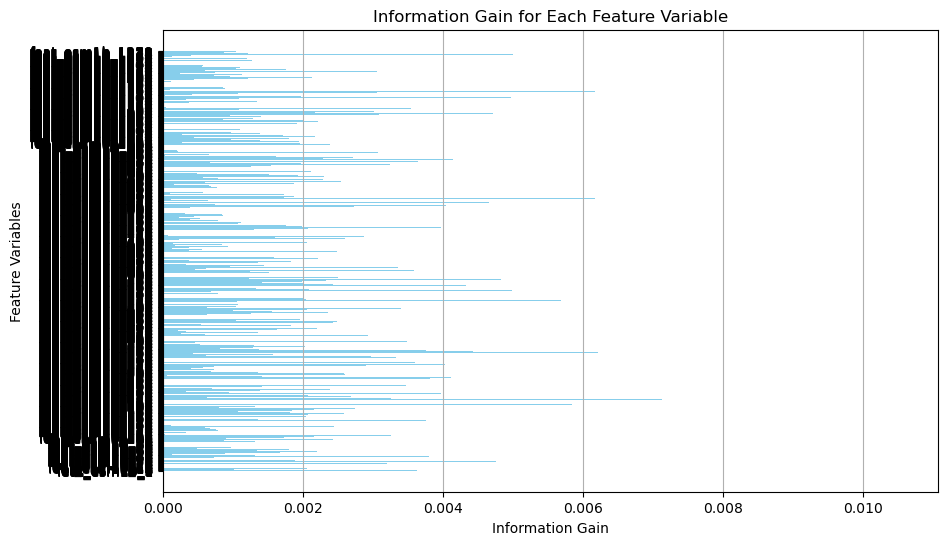

In [148]:
#Use information gain to select features
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

target_train = train_set['Class']
information_gain = mutual_info_classif(train_features, target_train)

# Plot Information Gain for each feature
plt.figure(figsize=(10, 6))
plt.barh(train_features.columns, information_gain, color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Feature Variables')
plt.title('Information Gain for Each Feature Variable')
plt.grid(axis='x')
plt.show()

In [149]:
#Select the top features to proceed with and update data sets
top_features = train_features.columns[information_gain > 0.002]
selected_columns = list(top_features) + ['Class']
train_set_selected = train_set[selected_columns]
test_set_selected = test_set[selected_columns]

print(train_set_selected.head())
print(test_set_selected.head())


   feat_esm1b_0  feat_esm1b_6  feat_esm1b_8  feat_esm1b_12  feat_esm1b_13  \
0      0.294185     -0.479394     -0.416052       0.024260       0.194165   
1      0.260795     -0.479394     -0.405133      -0.048396       0.284658   
2      0.184051     -0.479394     -0.085235      -0.077373       0.310214   
3      0.314233     -0.347873     -0.473537      -0.188469       0.105566   
4      0.096633     -0.365755     -0.278407       0.006994       0.386066   

   feat_esm1b_15  feat_esm1b_16  feat_esm1b_18  feat_esm1b_20  feat_esm1b_21  \
0      -0.273617       0.473750       0.355447       0.136090       0.299266   
1      -0.273617       0.639695       0.355447       0.101894       0.307027   
2      -0.142781       0.591466       0.135699       0.517927       0.186231   
3      -0.119486       0.801471       0.089419       0.172156       0.173143   
4       0.051050       0.445352       0.334826       0.056115       0.016136   

   ...  feat_esm1b_1238  feat_esm1b_1240  feat_esm1b_124

## Preliminary Modelling

Modelling different classification techniques and using the balanced accuracy for comparison

In [150]:
#Modelling RandomForest Classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

x_train = train_set_selected.filter(regex='^(feat_)')
y_train = train_set_selected['Class']

x_test = test_set_selected.filter(regex='^(feat_)')
y_test = test_set_selected['Class']

Random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
Random_forest.fit(x_train, y_train)

y_pred = Random_forest.predict(x_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99     12891
           1       0.67      0.02      0.03       237

    accuracy                           0.98     13128
   macro avg       0.82      0.51      0.51     13128
weighted avg       0.98      0.98      0.97     13128

Balanced Accuracy: 0.5083612450645087


In [151]:
# modelling logistic regression 

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000,random_state=42)
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.98      0.98     12891
           1       0.32      0.59      0.41       237

    accuracy                           0.97     13128
   macro avg       0.65      0.79      0.70     13128
weighted avg       0.98      0.97      0.97     13128

Balanced Accuracy: 0.7857159690452273


In [152]:
# Modellin decision tree classifier

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10,random_state=42)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99     12891
           1       0.45      0.17      0.25       237

    accuracy                           0.98     13128
   macro avg       0.72      0.58      0.62     13128
weighted avg       0.98      0.98      0.98     13128

Balanced Accuracy: 0.5825264216325982


In [153]:
#get info data for that relates to train data
test_index_values = test_set.index
df_train = df[~df.index.isin(test_index_values)]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36390 entries, 0 to 49605
Columns: 1290 entries, Info_PepID to feat_esm1b_1280
dtypes: float64(1280), int64(4), object(6)
memory usage: 358.4+ MB


In [162]:
#futher split data for validation 

split_data = GroupShuffleSplit(n_splits=1, random_state=42, test_size=0.25, train_size=0.75)
train_val_set = None
test_val_set = None
for train_index, test_index in split_data.split(train_set_selected, groups=df_train['Info_cluster']):
    train_val_set = train_set_selected.iloc[train_index]
    test_val_set = train_set_selected.iloc[test_index]

print(train_val_set.info())
print(test_val_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27238 entries, 0 to 49605
Columns: 370 entries, feat_esm1b_0 to Class
dtypes: float64(369), int64(1)
memory usage: 77.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9152 entries, 15 to 49603
Columns: 370 entries, feat_esm1b_0 to Class
dtypes: float64(369), int64(1)
memory usage: 25.9 MB
None


In [163]:
# validation on logistic regression 
x_val_train = train_val_set.filter(regex='^(feat_)')
y_val_train = train_val_set['Class']

x_val_test = test_val_set.filter(regex='^(feat_)')
y_val_test = test_val_set['Class']

logistic_regression = LogisticRegression(max_iter=1000,random_state=42)
logistic_regression.fit(x_val_train, y_val_train)

y_pred = logistic_regression.predict(x_val_test)

class_report = classification_report(y_val_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_val_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      8953
           1       0.19      0.02      0.04       199

    accuracy                           0.98      9152
   macro avg       0.58      0.51      0.51      9152
weighted avg       0.96      0.98      0.97      9152

Balanced Accuracy: 0.5091008488213434


In [164]:
# validation on decision tree
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10,random_state=42)

decision_tree.fit(x_val_train, y_val_train)

y_pred = decision_tree.predict(x_val_test)

class_report = classification_report(y_val_test, y_pred)
print("Classification Report:")
print(class_report)

balanced_acc = balanced_accuracy_score(y_val_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      8953
           1       0.10      0.02      0.03       199

    accuracy                           0.98      9152
   macro avg       0.54      0.51      0.51      9152
weighted avg       0.96      0.98      0.97      9152

Balanced Accuracy: 0.5059739667846661


## Addressing Class imbalance

Adressing the class imbalance using under sampling, over sampling and a cost-sensitive approach, seeing the effects this has on the balanced accuracy of Logistic regression classifier

In [165]:
# Calculate class distributions
train_class_distribution = train_set_selected['Class'].value_counts(normalize=True)
test_class_distribution = test_set_selected['Class'].value_counts(normalize=True)

# Print class distributions
print("Training set class distribution:\n", train_class_distribution)
print("\nTest set class distribution:\n", test_class_distribution)

Training set class distribution:
 -1    0.984309
 1    0.015691
Name: Class, dtype: float64

Test set class distribution:
 -1    0.981947
 1    0.018053
Name: Class, dtype: float64


In [167]:
#Perform random under sampling as see effects on the distribution

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
X_test_rus, y_test_rus = rus.fit_resample(x_test, y_test)


print("Class distribution in y_train_rus:")
print(y_train_rus.value_counts(normalize=True))

# Check the class distribution in the resampled test data
print("\nClass distribution in y_test_rus:")
print(y_test_rus.value_counts(normalize=True))



Class distribution in y_train_rus:
-1    0.5
 1    0.5
Name: Class, dtype: float64

Class distribution in y_test_rus:
-1    0.5
 1    0.5
Name: Class, dtype: float64


In [168]:
# modelling after random under sampling

from sklearn.metrics import matthews_corrcoef
#using undersampled classes
logistic_regression = LogisticRegression(max_iter=1000,random_state=42)
logistic_regression.fit(X_train_rus, y_train_rus)

y_pred = logistic_regression.predict(x_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.87      0.93     12891
           1       0.11      0.90      0.20       237

    accuracy                           0.87     13128
   macro avg       0.55      0.88      0.56     13128
weighted avg       0.98      0.87      0.91     13128

Matthews Correlation Coefficient (MCC): 0.28826561450803084


In [169]:
# perform random over sampling 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
X_test_ros, y_test_ros = ros.fit_resample(x_test, y_test)

print("Class distribution in y_train_ros:")
print(y_train_ros.value_counts(normalize=True))

# Check the class distribution in the resampled test data
print("\nClass distribution in y_test_ros:")
print(y_test_ros.value_counts(normalize=True))

Class distribution in y_train_ros:
 1    0.5
-1    0.5
Name: Class, dtype: float64

Class distribution in y_test_ros:
 1    0.5
-1    0.5
Name: Class, dtype: float64


In [170]:
# modelling after using over sampling

logistic_regression = LogisticRegression(max_iter=1000,random_state=42)
logistic_regression.fit(X_train_ros, y_train_ros)

y_pred = logistic_regression.predict(x_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95     12891
           1       0.13      0.79      0.23       237

    accuracy                           0.90     13128
   macro avg       0.56      0.85      0.59     13128
weighted avg       0.98      0.90      0.93     13128

Matthews Correlation Coefficient (MCC): 0.29920574955994794


In [172]:
#balancing using weights - cost sensitive approach

logistic_regression = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95     12891
           1       0.13      0.79      0.22       237

    accuracy                           0.90     13128
   macro avg       0.56      0.85      0.58     13128
weighted avg       0.98      0.90      0.93     13128

Matthews Correlation Coefficient (MCC): 0.2954834103881749


## Hyperparameter tuning

Finding the best hyperparameters for Logistic Regression

In [173]:
from sklearn.model_selection import GridSearchCV, GroupShuffleSplit
from sklearn.linear_model import LogisticRegression

# Define the parameter grid

param_grid = {
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs'],  # Try different solvers
    'C': [0.01,0.01,1.0, 10.0],  # Regularization strength
}

# Define the cross-validation strategy with GroupShuffleSplit
split_data = GroupShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

# Create the logistic regression model
logistic_regression = LogisticRegression(max_iter= 2000, random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=split_data, scoring='balanced_accuracy')
grid_search.fit(x_train, y_train, groups=df_train['Info_cluster'])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters
best_model = LogisticRegression(**best_params,max_iter=2000, random_state=42)
best_model.fit(x_train, y_train)

# Evaluate the model
balanced_accuracy = balanced_accuracy_score(y_test, best_model.predict(x_test))
print("Best hyperparameters:", best_params)
print("Balanced Accuracy:", balanced_accuracy)

Best hyperparameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Balanced Accuracy: 0.792657324460496


## Pipeline

Creating a pipeline using the preprocessing and classifer modelling steps

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.base import BaseEstimator, TransformerMixin

    
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('feature_selection', SelectKBest(mutual_info_classif, k=371)),  
    ('classifier', LogisticRegression(**best_params, class_weight = 'balanced', max_iter=2000, random_state=42))  
])

#Drop last feature column as new data doesn't contain this

train_features.drop(columns = ['feat_esm1b_1280'], inplace = True)
pipeline.fit(train_features, target_train)

test_features = test_set.filter(regex='^(feat_)')
target_test = test_set['Class']
test_features.drop(columns = ['feat_esm1b_1280'], inplace = True)
balanced_accuracy = balanced_accuracy_score(target_test, pipeline.predict(test_features))
print("Balanced Accuracy:", balanced_accuracy)

C:\Users\nadla\AppData\Local\Temp\ipykernel_21364\1210690858.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features.drop(columns = ['feat_esm1b_1280'], inplace = True)


Balanced Accuracy: 0.8383932858662063


C:\Users\nadla\AppData\Local\Temp\ipykernel_21364\1210690858.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features.drop(columns = ['feat_esm1b_1280'], inplace = True)


## Pedictions on Holdout set

Read the new data to understand its structure and use the pipeline to determine prediction values for the classes of the features provided.

In [175]:
df_holdout=pd.read_csv('df_holdout.csv', sep = ';')
print (df_holdout.describe) #shows the data in table
print (df_holdout.info()) #givs information relating to data


<bound method NDFrame.describe of          Info_PepID  Info_organism_id Info_protein_id  Info_pos Info_AA  \
0      CAA40511.1:2              5693      CAA40511.1        41       E   
1      CAA40511.1:2              5693      CAA40511.1        42       L   
2      CAA40511.1:2              5693      CAA40511.1        43       F   
3      CAA40511.1:2              5693      CAA40511.1        44       K   
4      CAA40511.1:2              5693      CAA40511.1        45       R   
...             ...               ...             ...       ...     ...   
5607  EAN90963.1:16              5693      EAN90963.1       724       V   
5608  EAN90963.1:16              5693      EAN90963.1       725       C   
5609  EAN90963.1:16              5693      EAN90963.1       726       V   
5610  EAN90963.1:16              5693      EAN90963.1       727       R   
5611  EAN90963.1:16              5693      EAN90963.1       728       K   

     Info_epitope_id Info_nPos Info_nNeg  Info_cluster  feat_esm1

In [176]:
#Drop feature 148 from data as not part of the training data

df_holdout.drop(columns = ['feat_esm1b_148'], inplace = True)
test_holdout_features = df_holdout.filter(regex='^(feat_)') #split data into features
predicted_class= pipeline.predict(test_holdout_features) # predict class data
print (predicted_class)

[-1 -1 -1 ... -1 -1 -1]


In [177]:
# Put togeter the data predictions with its corresponding Info_PepID and Info_pos
df_predictions = pd.DataFrame({
    'Info_PepID': df_holdout['Info_PepID'],
    'Info_pos': df_holdout['Info_pos'],
    'Prediction': y_pred[df_holdout.index]
})

df_predictions.to_csv('Predictions.csv', index=False)